<a href="https://colab.research.google.com/github/ThousandAI/Application-of-AI/blob/main/class10/detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-6suid2mj
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-6suid2mj


In [3]:
import detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

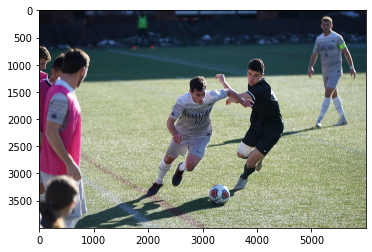

In [4]:
path = "/content/drive/MyDrive/Colab-Notebooks/Application-of-AI/class10/soccer.jpg"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [5]:
cfg = get_cfg()
#cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")


cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6

In [6]:
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

model_final_2d9806.pkl: 431MB [00:22, 19.4MB/s]                           
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [8]:
viz = Visualizer(image, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))

In [9]:
output = viz.draw_instance_predictions(outputs["instances"].to("cpu"))

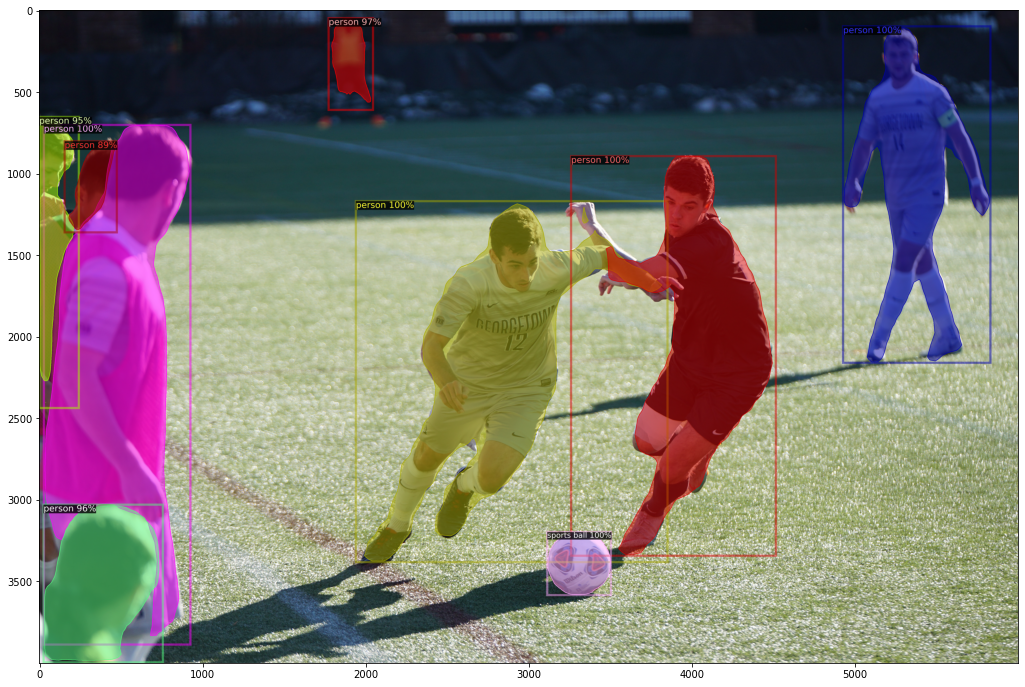

In [10]:
plt.figure(figsize = (20,12))
plt.imshow(output.get_image())